In [870]:
import yfinance as yf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [871]:
apple_stock = yf.download("AAPL", start="2020-01-01", end="2024-01-01")

/var/folders/9c/l2n8yh2n67jg1fc1q3s5dyf40000gn/T/ipykernel_6684/1922491523.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_stock = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [872]:
apple_stock

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487862,72.526549,70.783263,71.034724,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200
...,...,...,...,...,...
2023-12-22,192.192566,193.989405,191.567141,193.761066,37149600
2023-12-26,191.646545,192.480435,191.428144,192.202472,28919300


In [873]:
apple_stock.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487862,72.526549,70.783263,71.034724,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [874]:
apple_stock.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-12-22,192.192566,193.989405,191.567141,193.761066,37149600
2023-12-26,191.646545,192.480435,191.428144,192.202472,28919300
2023-12-27,191.745819,192.093281,189.700797,191.090629,48087700
2023-12-28,192.172684,193.244834,191.765661,192.728610,34049900
2023-12-29,191.130341,192.986741,190.336153,192.490376,42672100


In [875]:
apple_stock.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,138.377810,139.863374,136.743542,138.247374,9.895373e+07
std,33.459339,33.579797,33.319773,33.453056,5.439610e+07
min,54.378582,55.379535,51.528416,55.277744,2.404830e+07
25%,120.763401,122.008167,119.225837,120.869271,6.407675e+07
50%,143.250969,144.829634,141.584398,143.100298,8.467540e+07
75%,163.691654,165.974631,162.434235,163.960252,1.155069e+08
max,196.669769,198.168786,195.567834,196.580427,4.265100e+08


In [876]:
apple_stock = apple_stock.drop(columns=["High", "Low", "Volume", "Open"])

In [877]:
apple_stock.dtypes

Price  Ticker
Close  AAPL      float64
dtype: object

In [878]:
apple_stock.to_csv("AAPL.csv")

In [879]:
df = pd.read_csv("AAPL.csv", header=[0])


In [880]:
df

,Price,Close
0,Ticker,AAPL
1,Date,NaN
2,2020-01-02,72.62084197998047
3,2020-01-03,71.9148178100586
4,2020-01-06,72.48786163330078
...,...,...
1003,2023-12-22,192.19256591796875
1004,2023-12-26,191.64654541015625
1005,2023-12-27,191.74581909179688
1006,2023-12-28,192.1726837158203


In [881]:
df.shape

(1008, 2)

In [882]:
df.values

array([['Ticker', 'AAPL'],
       ['Date', nan],
       ['2020-01-02', '72.62084197998047'],
       ...,
       ['2023-12-27', '191.74581909179688'],
       ['2023-12-28', '192.1726837158203'],
       ['2023-12-29', '191.13034057617188']], dtype=object)

In [883]:
df = df.drop([0, 1], axis=0)
df

,Price,Close
2,2020-01-02,72.62084197998047
3,2020-01-03,71.9148178100586
4,2020-01-06,72.48786163330078
5,2020-01-07,72.14694213867188
6,2020-01-08,73.30751037597656
...,...,...
1003,2023-12-22,192.19256591796875
1004,2023-12-26,191.64654541015625
1005,2023-12-27,191.74581909179688
1006,2023-12-28,192.1726837158203


In [884]:
df.reset_index(drop=True, inplace=True)
df['Date'] = df["Price"]
df.drop(columns=["Price"], inplace=True)

cols = list(df.columns)

i, j = cols.index('Date'), cols.index('Close')
cols[i], cols[j] = cols[j], cols[i]

df = df[cols]
df

,Date,Close
0,2020-01-02,72.62084197998047
1,2020-01-03,71.9148178100586
2,2020-01-06,72.48786163330078
3,2020-01-07,72.14694213867188
4,2020-01-08,73.30751037597656
...,...,...
1001,2023-12-22,192.19256591796875
1002,2023-12-26,191.64654541015625
1003,2023-12-27,191.74581909179688
1004,2023-12-28,192.1726837158203


### SMA
Here, we will see how a SMA works and what is the total profit and other stuff. 

In [885]:
df["sma_50"] = df['Close'].rolling(window=50).mean()
df['sma_20'] = df["Close"].rolling(window=20).mean()
df.columns = ["date", "close", "sma_50", "sma_20"]
df



/var/folders/9c/l2n8yh2n67jg1fc1q3s5dyf40000gn/T/ipykernel_6684/2723015053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sma_50"] = df['Close'].rolling(window=50).mean()
/var/folders/9c/l2n8yh2n67jg1fc1q3s5dyf40000gn/T/ipykernel_6684/2723015053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma_20'] = df["Close"].rolling(window=20).mean()


,date,close,sma_50,sma_20
0,2020-01-02,72.62084197998047,NaN,NaN
1,2020-01-03,71.9148178100586,NaN,NaN
2,2020-01-06,72.48786163330078,NaN,NaN
3,2020-01-07,72.14694213867188,NaN,NaN
4,2020-01-08,73.30751037597656,NaN,NaN
...,...,...,...,...
1001,2023-12-22,192.19256591796875,183.959352,192.260548
1002,2023-12-26,191.64654541015625,184.245960,192.422364
1003,2023-12-27,191.74581909179688,184.537130,192.558865
1004,2023-12-28,192.1726837158203,184.867969,192.767834


In [886]:
## We need to convert the date column to date time object. 

df['date'] = pd.to_datetime(df['date'])
df


/var/folders/9c/l2n8yh2n67jg1fc1q3s5dyf40000gn/T/ipykernel_6684/3557649849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,date,close,sma_50,sma_20
0,2020-01-02,72.62084197998047,NaN,NaN
1,2020-01-03,71.9148178100586,NaN,NaN
2,2020-01-06,72.48786163330078,NaN,NaN
3,2020-01-07,72.14694213867188,NaN,NaN
4,2020-01-08,73.30751037597656,NaN,NaN
...,...,...,...,...
1001,2023-12-22,192.19256591796875,183.959352,192.260548
1002,2023-12-26,191.64654541015625,184.245960,192.422364
1003,2023-12-27,191.74581909179688,184.537130,192.558865
1004,2023-12-28,192.1726837158203,184.867969,192.767834


In [887]:
df.isnull().sum()
# So, no missing values

date       0
close      0
sma_50    49
sma_20    19
dtype: int64

In [888]:
new_df = df['close'].iloc[:10]

In [889]:
df[['close', 'sma_50', "sma_20"]] = df[['close', "sma_50", "sma_20"]].astype(float)
df

/var/folders/9c/l2n8yh2n67jg1fc1q3s5dyf40000gn/T/ipykernel_6684/899562715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['close', 'sma_50', "sma_20"]] = df[['close', "sma_50", "sma_20"]].astype(float)


,date,close,sma_50,sma_20
0,2020-01-02,72.620842,NaN,NaN
1,2020-01-03,71.914818,NaN,NaN
2,2020-01-06,72.487862,NaN,NaN
3,2020-01-07,72.146942,NaN,NaN
4,2020-01-08,73.307510,NaN,NaN
...,...,...,...,...
1001,2023-12-22,192.192566,183.959352,192.260548
1002,2023-12-26,191.646545,184.245960,192.422364
1003,2023-12-27,191.745819,184.537130,192.558865
1004,2023-12-28,192.172684,184.867969,192.767834


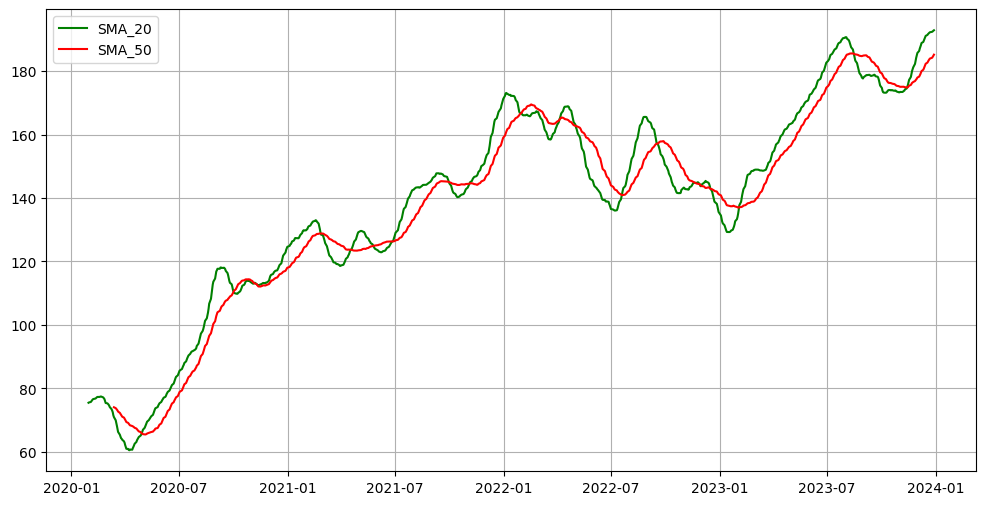

In [890]:
x = df['date']
y1 = df['close']
y2= df['sma_20']
y3=df['sma_50']

plt.figure(figsize=(12, 6))

plt.plot(x, y2, 'g', label='SMA_20')
plt.plot(x, y3, 'r', label='SMA_50')
plt.legend()
plt.grid()
plt.show()


In [891]:
# alright, now we have finally generated the graph for sma_20 and sma_50 ( quite a struggle goddamit. )

def buy_sell(df):
    sma_50 = df['sma_50']
    sma_20 = df['sma_20']
    dates = df['date']
    close_price = df['close']
    flag=0
    
    # The whole function of the flag is to indicate the places when we can buy or sell : 
    # 1 - Already Bought. Ready to sell
    # 0 - Sold. Ready to Buy
    
    sig_buy_price = []
    sig_sell_price = []
    dates_of_occasion = []

    for i in range(len(dates)):
        
        # The whole logic of the thing is to find out the tickers for when to buy and when to 
        # sell the stock. 
        
        if sma_20[i] > sma_50[i] : 
            
            # This is the case where the sma 20 > sma 50 , so we buy the stock. also, we check if we have previously bought the stock
            # and make sure we buy it only when we have the required fund amount and not when we cant. 
            
            if flag == 0  : 
                sig_buy_price.append(close_price[i])
                sig_sell_price.append(np.nan)
                dates_of_occasion.append(dates[i])
                
                flag = 1
        
        if sma_20[i] < sma_50[i] : 
           
           if flag == 1 : 
               
               sig_buy_price.append(np.nan)
               sig_sell_price.append(close_price[i])
               dates_of_occasion.append(dates[i])
               
               flag = 0
    
    return sig_buy_price, sig_sell_price, dates_of_occasion
               
             
    

In [892]:
final_df = pd.DataFrame()
final_buys, final_sells, final_dates = buy_sell(df)
final_df['date'] = final_dates
final_df['buy_price'] = final_buys
final_df['sell_price'] = final_sells

final_df.isnull().sum()

date           0
buy_price     10
sell_price    11
dtype: int64

In [893]:
final_df.dropna()
final_df
print("This is the final profit for this strategy :", pd.Series(final_sells).sum() - pd.Series(final_buys).sum() + final_buys[-1])

This is the final profit for this strategy : 51.67858123779297


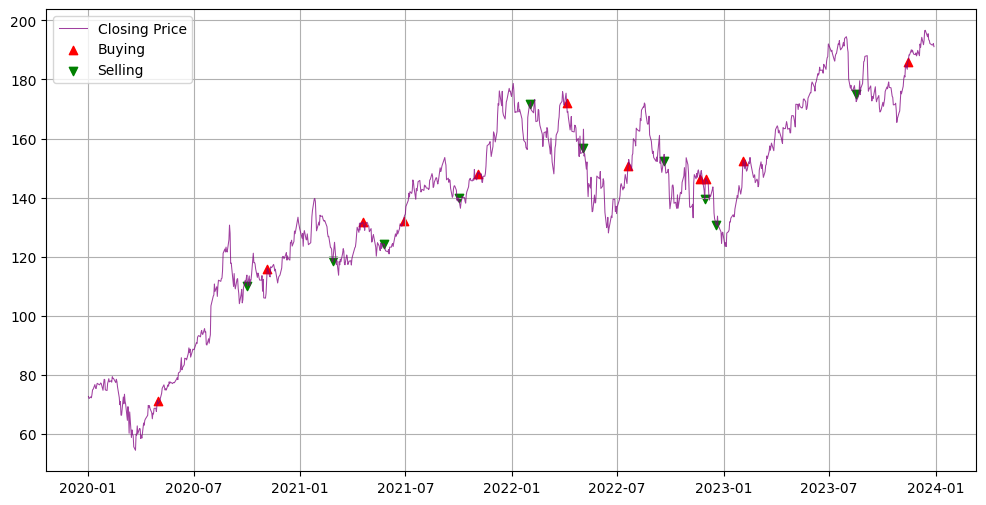

In [894]:
# Since we have gained a loss, we need to upgrade the strategy to improve the model. Before that, i need indicate the buy and sell signals 
# on the graph. 

x = df['date']
y1 = df['close']
y2= df['sma_20']
y3=df['sma_50']

plt.figure(figsize=(12, 6))
plt.plot(x, y1, 'purple', label='Closing Price',linewidth=0.75, alpha=0.75)
plt.scatter(final_dates, final_buys, color='red', marker='^', label="Buying")
plt.scatter(final_dates, final_sells, color='green', marker='v', label='Selling')
plt.legend()
plt.grid()
plt.show()



### EMA

Now, we will discuss how EMA works.

In [895]:
df

,date,close,sma_50,sma_20
0,2020-01-02,72.620842,NaN,NaN
1,2020-01-03,71.914818,NaN,NaN
2,2020-01-06,72.487862,NaN,NaN
3,2020-01-07,72.146942,NaN,NaN
4,2020-01-08,73.307510,NaN,NaN
...,...,...,...,...
1001,2023-12-22,192.192566,183.959352,192.260548
1002,2023-12-26,191.646545,184.245960,192.422364
1003,2023-12-27,191.745819,184.537130,192.558865
1004,2023-12-28,192.172684,184.867969,192.767834


In [896]:
df.drop(columns=["sma_50", "sma_20"], inplace=True)
df

# Now, the data is ready to be used again for ema.

,date,close
0,2020-01-02,72.620842
1,2020-01-03,71.914818
2,2020-01-06,72.487862
3,2020-01-07,72.146942
4,2020-01-08,73.307510
...,...,...
1001,2023-12-22,192.192566
1002,2023-12-26,191.646545
1003,2023-12-27,191.745819
1004,2023-12-28,192.172684


In [897]:
def calculate_EMA(prices, N):
    
    final_EMA = []
    sf = 2 / ( N + 1 )
    
    final_EMA.append(prices[0])
    
    for i in range (1, len(prices)):
        
        ema_i = sf * prices[i] + (1-sf) * final_EMA[i-1]
        
        final_EMA.append(ema_i)
        
    return final_EMA
    
df['ema_15'] = calculate_EMA(df['close'], 15)
df

,date,close,ema_15
0,2020-01-02,72.620842,72.620842
1,2020-01-03,71.914818,72.532589
2,2020-01-06,72.487862,72.526998
3,2020-01-07,72.146942,72.479491
4,2020-01-08,73.307510,72.582993
...,...,...,...
1001,2023-12-22,192.192566,192.864394
1002,2023-12-26,191.646545,192.712163
1003,2023-12-27,191.745819,192.591370
1004,2023-12-28,192.172684,192.539034


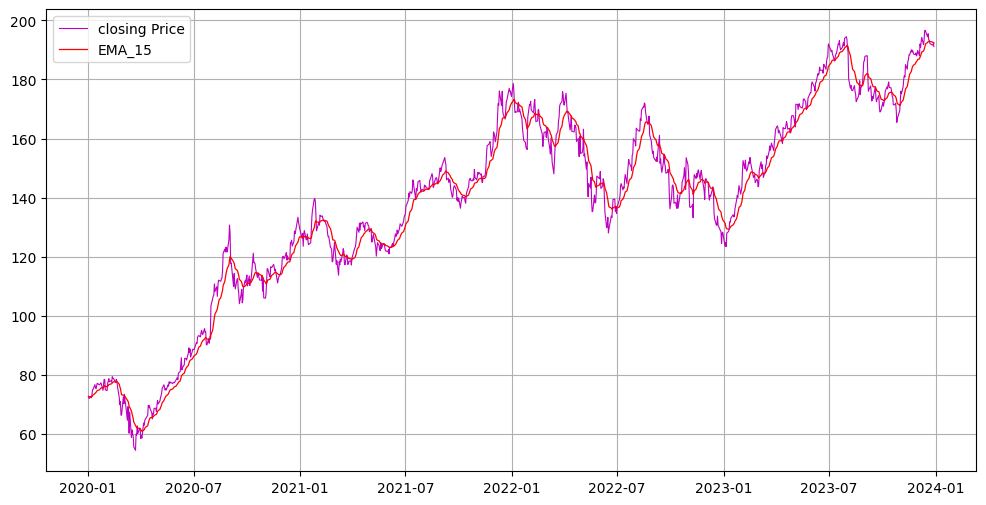

In [898]:
plt.figure(figsize=(12, 6))

x = df['date']
y1=df['close']
y2=df['ema_15']

plt.plot(x, y1, 'm', label='closing Price', linewidth=0.8)
plt.plot(x, y2, 'r', label='EMA_15', linewidth =0.9)

plt.grid()
plt.legend()
plt.show()

### Backtesting

In [1]:
import backtesting

/opt/miniconda3/envs/pyenv/lib/python3.12/site-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...